The [translate:Pose model from MediaPipe] is designed to detect human poses by identifying 33 key points on the body, enabling it to accurately determine the positions of different body parts. This model employs a two-stage detection architecture that first locates the general pose region and then performs precise estimation of each key point's position. It is optimized for real-time performance and efficiency, making it suitable for mobile and edge devices.


MediaPipe

Installing the necessary libraries

In [ ]:
!pip uninstall -y protobuf
!pip install protobuf==5.26.1

Found existing installation: protobuf 5.29.5
Uninstalling protobuf-5.29.5:
  Successfully uninstalled protobuf-5.29.5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 4.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.13.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 5.26.1 which is incompatible.


In [ ]:
!pip install -U protobuf google-colab ydf mediapipe

import mediapipe as mp
import time

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mediapipe to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of mediapipe to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of opencv-contrib-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 63.4 MB/s eta 0:00:00
   ━━

/usr/local/lib/python3.12/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.7.2 is installed, but it is not compatible with the installed jaxlib version 0.7.1, so it will not be used.
  warnings.warn(


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

Photo processing:


/usr/local/lib/python3.12/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.7.2 is installed, but it is not compatible with the installed jaxlib version 0.7.1, so it will not be used.
  warnings.warn(


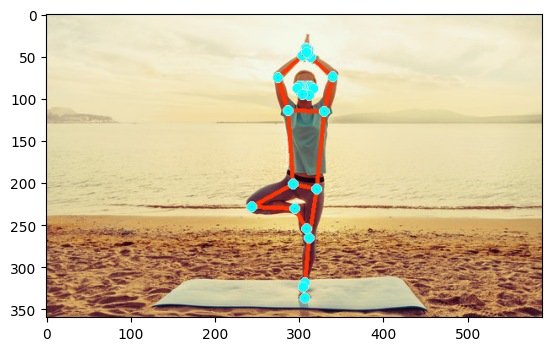

In [ ]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt

# Initialize MediaPipe Pose with high model complexity for better accuracy
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(model_complexity=2)  # 2 = highest complexity, 1 = medium, 0 = low

# Load the input image from file
image_path = 'your.jpg'
image = cv2.imread(image_path)
height, width, _ = image.shape

# Convert image from BGR (OpenCV default) to RGB (MediaPipe requirement)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# MediaPipe processing requires the image to be write-protected for better performance
image.flags.writeable = False

# Process the image through MediaPipe Pose model
# This detects 33 pose landmarks (nose, shoulders, elbows, wrists, hips, knees, ankles, etc.)
results = pose.process(image)

# Make image writeable again for drawing landmarks
image.flags.writeable = True

# Convert back to BGR for OpenCV operations
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# Draw the pose landmarks and connections on the image
mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,  # Contains the 33 detected landmarks
        mp_pose.POSE_CONNECTIONS,  # Pre-defined connections between landmarks (skeleton)
        mp_drawing.DrawingSpec(   # Styling for the landmarks (points)
          color=(255,255,0),     # Yellow color (BGR format)
          thickness=3,           # Thickness of landmark circles
          circle_radius=3        # Radius of landmark circles
        ),
        mp_drawing.DrawingSpec(  # Styling for the connections (lines)
          color=(0,50,255),     # Reddish color (BGR format)
          thickness=4,          # Thickness of connection lines
          circle_radius=2       # Not used for connections
        )
    )

# Convert back to RGB for matplotlib display
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the processed image with pose landmarks using matplotlib
plt.imshow(image)  # Show image with detected pose landmarks and connections
plt.show()  # Render the plot window

Video processing:

Processing: m.mp4
Video: 295 frames, 24.00 FPS

Processing video...
Processed: 50/295 (16.9%)
Processed: 100/295 (33.9%)
Processed: 150/295 (50.8%)
Processed: 200/295 (67.8%)
Processed: 250/295 (84.7%)

Done! Collected array: (295, 133) → [frames × (1 + 33×4)]

Sample frames:
Frame 1


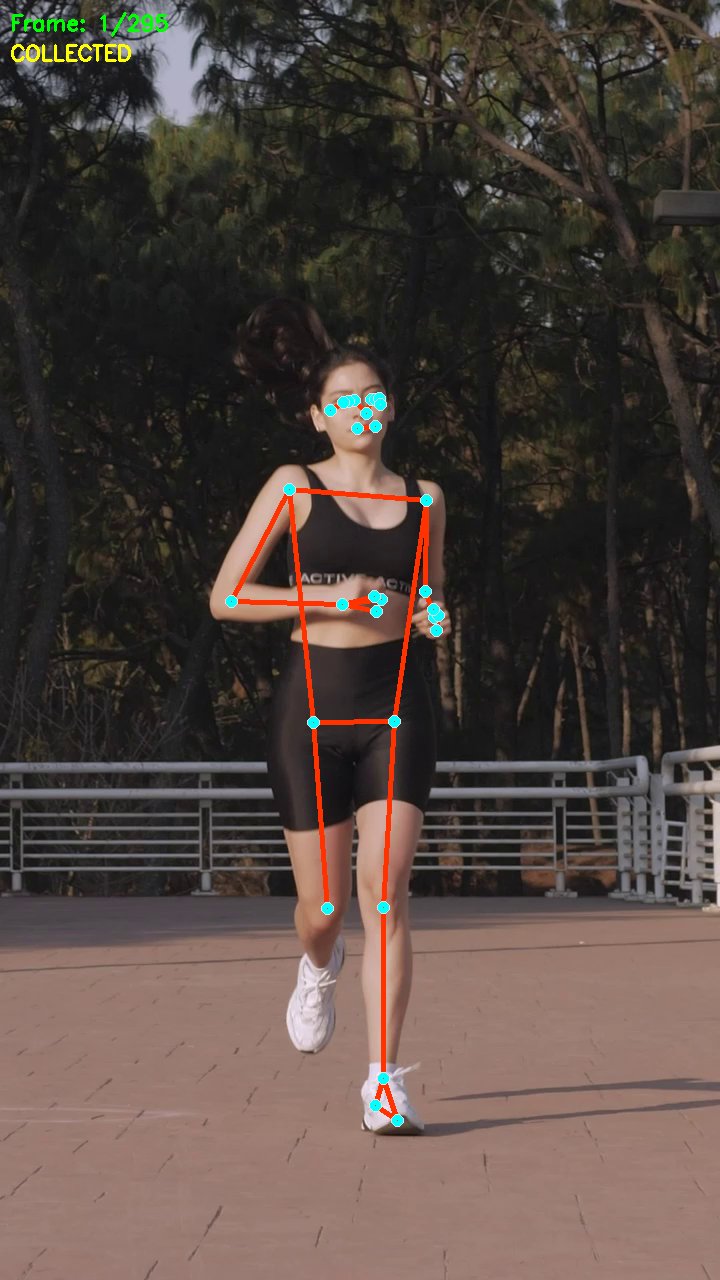

Frame 2


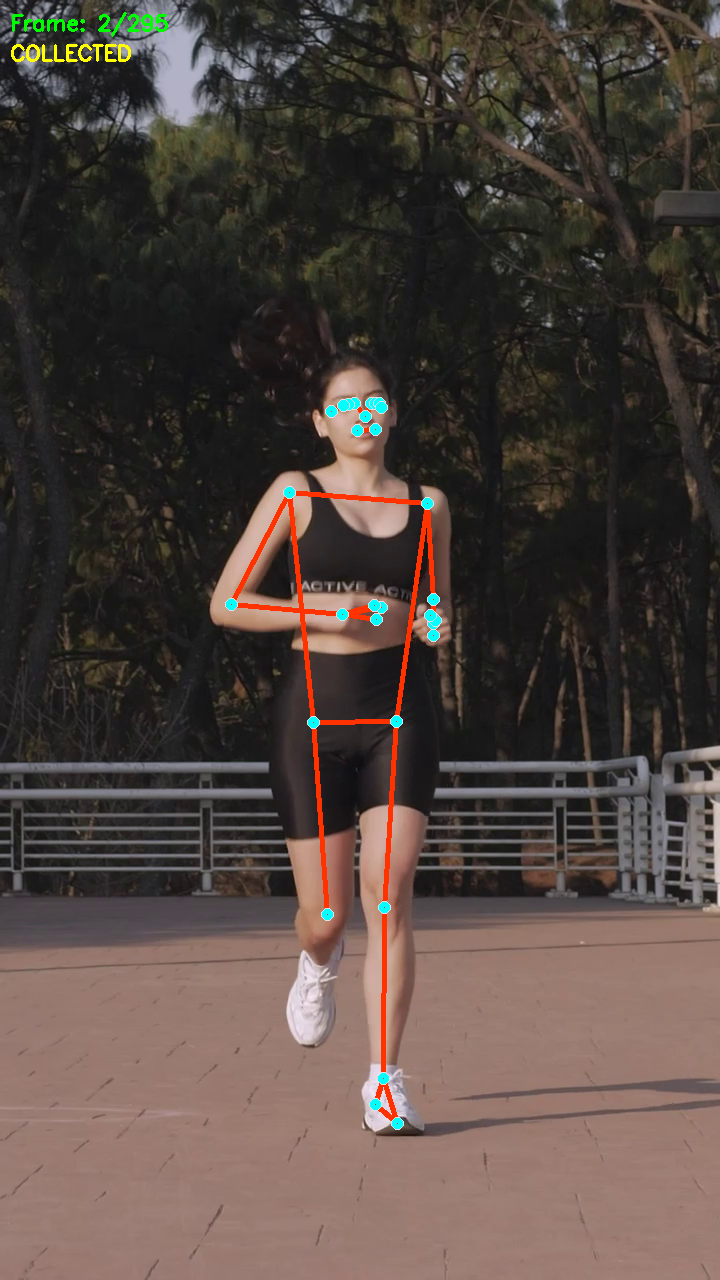

Frame 3


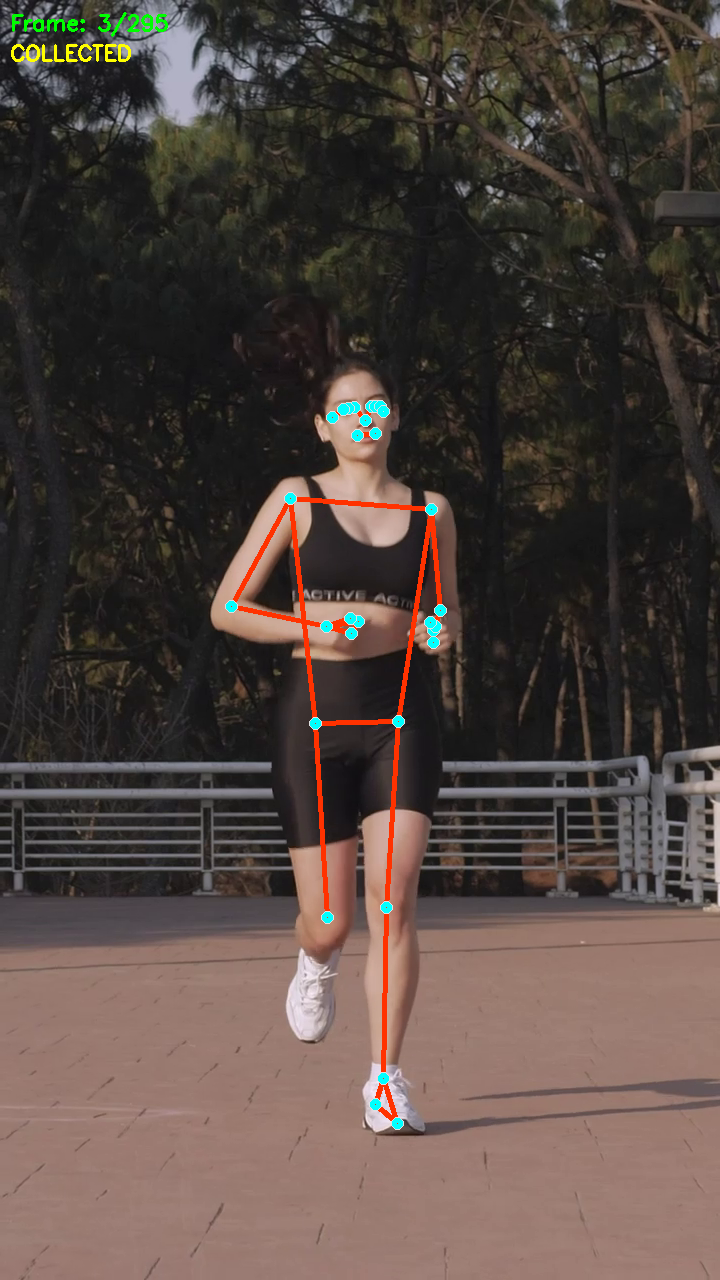

Frame 4


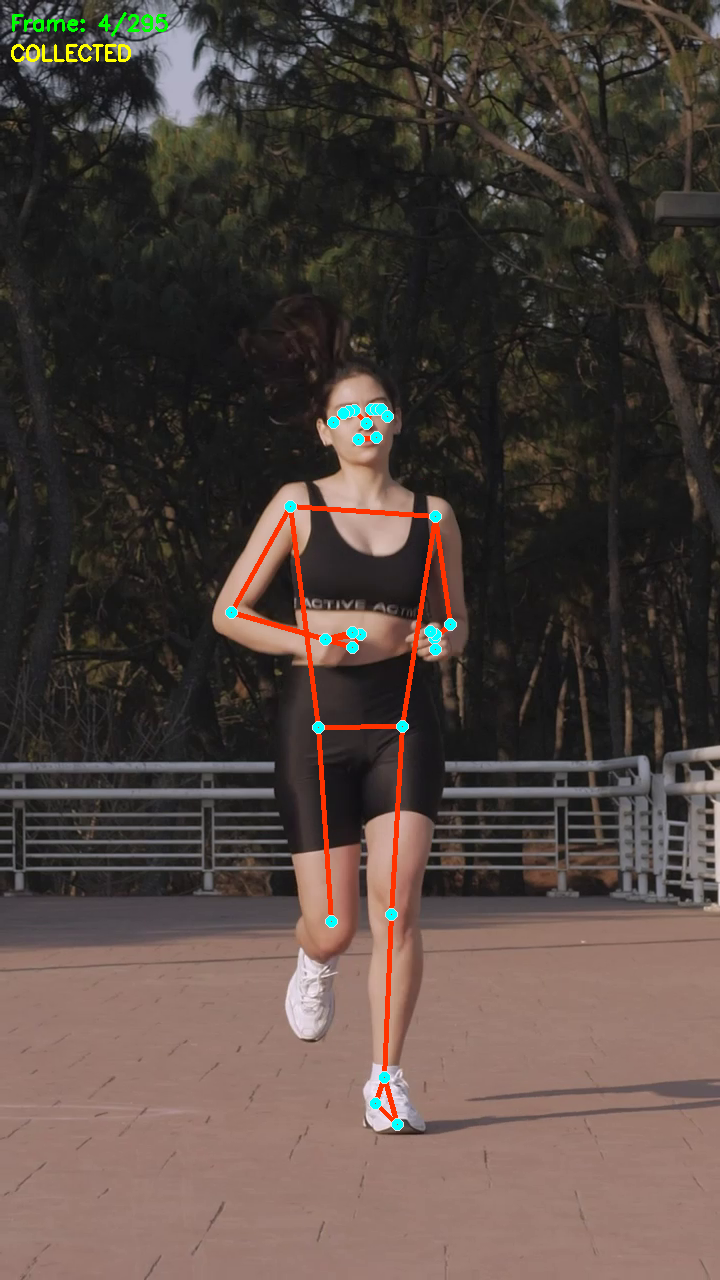

Frame 5


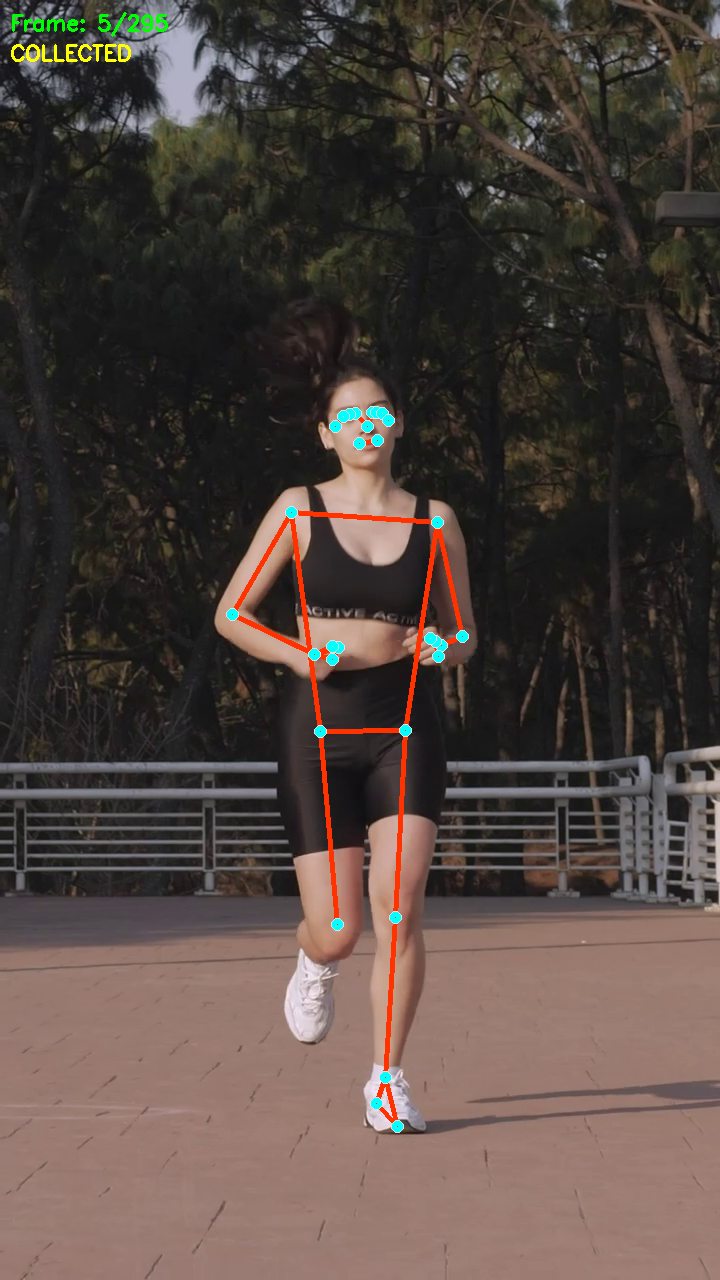


Frames processed: 295
Poses detected: 295 (100.0%)
Returned np.array: shape = (295, 133)

Sample data (first 2 frames):
[[ 1.          0.50915444  0.32267374 -0.19824752  0.9993344   0.5154898
   0.3119328  -0.17294356  0.9986773   0.5220581   0.3119298  -0.17337202
   0.99851745  0.527069    0.31167823 -0.17333472  0.99902105  0.49246007
   0.31276202 -0.18582651  0.99904805  0.48446572  0.31339824 -0.18651304
   0.9990909   0.47684747  0.31428403 -0.18688233  0.99934465  0.52856845
   0.31609082 -0.0135039   0.999199    0.45920756  0.32080173 -0.06897883
   0.9987943   0.5216817   0.33351582 -0.13066368  0.99924564  0.49713615
   0.3343886  -0.15014829  0.99915946  0.59194297  0.39085543  0.10845438
   0.99993134  0.40181077  0.38234872 -0.03562997  0.9998518   0.59159005
   0.4623564   0.06641058  0.6603283   0.3213845   0.4698766  -0.15780811
   0.9539816   0.6038674   0.482515   -0.22541165  0.8603208   0.47559887
   0.47192377 -0.40633813  0.972667    0.60571575  0.49265653 -0.2

In [9]:
import mediapipe as mp
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

#  INITIALIZATION
mp_drawing = mp.solutions.drawing_utils  # Utilities for drawing landmarks
mp_pose = mp.solutions.pose  # Pose estimation model

#  NAMES OF 33 LANDMARKS
KEYPOINT_NAMES = [
    "nose", "left_eye_inner", "left_eye", "left_eye_outer", "right_eye_inner", "right_eye", "right_eye_outer",
    "left_ear", "right_ear", "mouth_left", "mouth_right",
    "left_shoulder", "right_shoulder", "left_elbow", "right_elbow", "left_wrist", "right_wrist",
    "left_pinky", "right_pinky", "left_index", "right_index", "left_thumb", "right_thumb",
    "left_hip", "right_hip", "left_knee", "right_knee", "left_ankle", "right_ankle",
    "left_heel", "right_heel", "left_foot_index", "right_foot_index"
]

def process_video(input_path):
    # Check if input file exists
    if not os.path.exists(input_path):
        print(f"Error: File {input_path} not found!")
        return None

    # Initialize MediaPipe Pose model with specified parameters
    pose = mp_pose.Pose(
        model_complexity=2,  # Highest complexity for better accuracy
        min_detection_confidence=0.5,  # Minimum confidence for pose detection
        min_tracking_confidence=0.5,  # Minimum confidence for pose tracking
        static_image_mode=False  # False for video processing
    )

    # Open video file
    cap = cv2.VideoCapture(input_path)
    if not cap.isOpened():
        print(f"Error: Could not open video {input_path}")
        return None

    # Get video properties
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    print(f"Video: {total_frames} frames, {fps:.2f} FPS")

    print("\nProcessing video...")

    # Initialize counters and storage
    frame_count = 0
    detection_count = 0
    sample_frames = []  # Store sample frames for display

    #  PREPARE DATA ARRAY: [frame, 33×(x,y,z,confidence)]
    data = []  # Main data storage list

    # Process video frame by frame
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break  # End of video

        frame_count += 1  # Increment frame counter

        # Convert BGR to RGB for MediaPipe processing
        image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image_rgb.flags.writeable = False  # Optimize performance
        results = pose.process(image_rgb)  # Process frame with MediaPipe
        image_rgb.flags.writeable = True
        image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)  # Convert back to BGR

        #  DRAW ALL 33 LANDMARKS
        if results.pose_landmarks:
            detection_count += 1  # Count successful detections

            # Draw pose landmarks and connections on the frame
            mp_drawing.draw_landmarks(
                image_bgr,
                results.pose_landmarks,
                mp_pose.POSE_CONNECTIONS,  # Pre-defined connections between landmarks
                mp_drawing.DrawingSpec(color=(255, 255, 0), thickness=3, circle_radius=3),  # Landmark style
                mp_drawing.DrawingSpec(color=(0, 50, 255), thickness=4)  # Connection style
            )

            # === COLLECT DATA INTO LIST ===
            row = [frame_count]  # Start with frame number
            for i in range(33):  # Iterate through all 33 landmarks
                lm = results.pose_landmarks.landmark[i]
                # Append x, y, z coordinates and visibility confidence
                row += [lm.x, lm.y, lm.z, lm.visibility]
            data.append(row)  # Add row to main data list

            # Add frame information text
            cv2.putText(image_bgr, f"Frame: {frame_count}/{total_frames}", (10, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
            cv2.putText(image_bgr, f"COLLECTED", (10, 60),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)
        else:
            # If no pose detected - fill with zeros
            row = [frame_count] + [0.0] * (33 * 4)  # 33 landmarks × 4 values each
            data.append(row)
            cv2.putText(image_bgr, f"Frame: {frame_count} - No pose", (10, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        # Store sample frames (first 5 frames)
        if frame_count <= 5:
            sample_frames.append(image_bgr.copy())

        # Progress reporting every 50 frames
        if frame_count % 50 == 0:
            print(f"Processed: {frame_count}/{total_frames} ({frame_count/total_frames*100:.1f}%)")

    #  CLEANUP
    cap.release()  # Release video capture
    pose.close()   # Close MediaPipe pose model

    #  CONVERT TO NUMPY ARRAY
    data_array = np.array(data, dtype=np.float32)
    print(f"\nDone! Collected array: {data_array.shape} → [frames × (1 + 33×4)]")

    # DISPLAY SAMPLE FRAMES
    print(f"\nSample frames:")
    for i, frame in enumerate(sample_frames):
        print(f"Frame {i+1}")
        cv2_imshow(frame)  # Display frame in Colab

    #  STATISTICS
    print(f"\nFrames processed: {frame_count}")
    print(f"Poses detected: {detection_count} ({detection_count/frame_count*100:.1f}%)")
    print(f"Returned np.array: shape = {data_array.shape}")

    return data_array  #  RETURN THE FINAL NUMPY ARRAY



#  MAIN EXECUTION
if __name__ == "__main__":
    input_video = "m.mp4"


    print(f"Processing: {input_video}")
    landmarks_array = process_video(input_video)

    # Display sample data if processing successful
    if landmarks_array is not None:
        print(f"\nSample data (first 2 frames):")
        print(landmarks_array[:1])